In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train=pd.read_csv("/content/drive/My Drive/House_train.csv")
test=pd.read_csv("/content/drive/My Drive/House_test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [27]:
train.corr()['SalePrice']


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [0]:
re_train=train[['1stFlrSF','OverallQual','GarageArea','GarageCars','EnclosedPorch','KitchenAbvGr','TotRmsAbvGrd','FullBath','GrLivArea','TotalBsmtSF','YearBuilt','YearRemodAdd','OverallCond','MSSubClass','SalePrice']]

In [46]:
re_train.head()

,1stFlrSF,OverallQual,GarageArea,GarageCars,EnclosedPorch,KitchenAbvGr,TotRmsAbvGrd,FullBath,GrLivArea,TotalBsmtSF,YearBuilt,YearRemodAdd,OverallCond,MSSubClass,SalePrice
0,856,7,548,2,0,1,8,2,1710,856,2003,2003,5,60,208500
1,1262,6,460,2,0,1,6,2,1262,1262,1976,1976,8,20,181500
2,920,7,608,2,0,1,6,2,1786,920,2001,2002,5,60,223500
3,961,7,642,3,272,1,7,1,1717,756,1915,1970,5,70,140000
4,1145,8,836,3,0,1,9,2,2198,1145,2000,2000,5,60,250000


In [50]:
re_train.isnull().sum()


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [53]:
x=re_train.iloc[:,:-1]
y=re_train.iloc[:,14:]

from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
x=standard.fit_transform(x)


AttributeError: ignored

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)

In [59]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
prediction=model.predict(x_test)

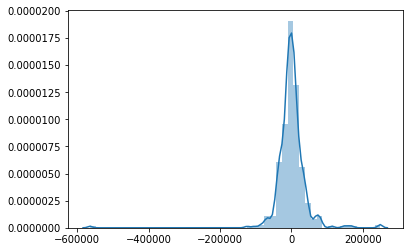

In [61]:
sns.distplot(y_test-prediction)

In [64]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,prediction))
print("MSE",metrics.mean_squared_error(y_test,prediction))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 23727.8904464059
MSE 1971118712.3929775
RMSE 44397.282714069086


In [0]:
re_test=test[['Id','1stFlrSF','OverallQual','GarageArea','GarageCars','EnclosedPorch','KitchenAbvGr','TotRmsAbvGrd','FullBath','GrLivArea','TotalBsmtSF','YearBuilt','YearRemodAdd','OverallCond','MSSubClass']]

In [85]:
re_test.head()
re_test.isnull().sum()
re_test.fillna(re_test.mean(),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [86]:
re_test.isnull().sum()


Id               0
1stFlrSF         0
OverallQual      0
GarageArea       0
GarageCars       0
EnclosedPorch    0
KitchenAbvGr     0
TotRmsAbvGrd     0
FullBath         0
GrLivArea        0
TotalBsmtSF      0
YearBuilt        0
YearRemodAdd     0
OverallCond      0
MSSubClass       0
dtype: int64

In [0]:
test1=re_test.iloc[:,1:]
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
test1=standard.fit_transform(test1)


In [93]:
predict=model.predict(test1)
predict

array([[128698.9735391 ],
       [171539.60245223],
       [177390.91678089],
       ...,
       [168292.86411413],
       [109014.31761344],
       [242683.19894361]])

In [94]:
a=pd.DataFrame(predict)
a

,0
0,128698.973539
1,171539.602452
2,177390.916781
3,196437.238986
4,206062.320878
...,...
1454,76668.345403
1455,80143.377092
1456,168292.864114
1457,109014.317613


In [95]:
b=pd.DataFrame(re_test['Id'])
b

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [0]:
df=pd.concat([b,a],axis=1)


In [97]:
df.head()

,Id,0
0,1461,128698.973539
1,1462,171539.602452
2,1463,177390.916781
3,1464,196437.238986
4,1465,206062.320878


In [0]:
df.to_csv("sample_submission.csv")